# Aprendizaje Automático - Proyecto Final
## Regresión logística

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import scipy.optimize as opt

pd.options.mode.chained_assignment = None

import plot_functions as plt_f

Leemos el archivo:

In [2]:
dt = pd.read_csv("heart.csv")
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Hacemos una traducción al español de los valores del dataset.

In [3]:
dt.columns = ['edad', 'sexo', 'dolor', 
              'tension', 'colesterol', 'glucemia', 
              'ecg', 'frec_cardiaca', 'angina_ej', 
              'depresion_st', 'pendiente_st', 
              'num_valvulas', 'test_talio', 
              'enfermedad']

dt.head()

,edad,sexo,dolor,tension,colesterol,glucemia,ecg,frec_cardiaca,angina_ej,depresion_st,pendiente_st,num_valvulas,test_talio,enfermedad
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Preparamos el modelo para la regresión logística
Para ello, hay que normalizar los datos.

In [4]:
y = dt.enfermedad.values
X_data = dt.drop(['enfermedad'], axis = 1)

y = np.reshape(y, (np.shape(y)[0], 1))

# Normalizacion
X = (X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data)).values

A continuación, inicializaremos algunas variables importantes para la regresión.

In [5]:
m = np.shape(X)[0]
X_ones = np.hstack([np.ones([m, 1]), X])
n = np.shape(X_ones)[1]

Lambda = 1.0
Theta = np.zeros(n)

Ahora, definiremos funciones importantes para la regresión logística. Estas serán la función **sigmoide**, la de **coste** y la de **gradiente**.

In [6]:
# Sigmoide
def g(z):
    return 1 / (1 + np.exp(-z))

def coste(Theta, X, y):
    m = np.shape(X)[0]
    auxTheta = np.reshape(Theta, (np.shape(Theta)[0], 1))
    Aux = (np.log(g(X @ auxTheta))).T @ y
    Aux += (np.log(1 - g(X @ auxTheta))).T @ (1 - y)
    return -Aux / m

def gradiente(Theta, X, y):
    m = np.shape(X)[0]
    auxTheta = np.reshape(Theta, (np.shape(Theta)[0], 1))
    Aux = X.T @ (g(X @ auxTheta) - y)
    return Aux / m

También definimos las funciones de coste y gradiente **regularizados**.

In [7]:
def coste_reg(Theta, X, y, Lambda):
    m = np.shape(X)[0]
    Aux = (np.log(g(X @ Theta))).T @ y
    Aux += (np.log(1 - g(X @ Theta))).T @ (1 - y)
    Cost = -Aux / m
    Regcost = (Lambda / (2 * m)) * sum(Theta ** 2)
    return Cost + Regcost 

def gradiente_reg(Theta, X, y, Lambda):
    m = np.shape(X)[0]
    Aux = X.T @ (g(X @ Theta) - y)
    Grad = Aux / m
    theta_aux = Theta
    theta_aux[0] = 0.0
    Grad = Grad + (Lambda / m) * theta_aux
    return Grad

Con esto, ya podemos realizar la regresión logística y comprobar los resultados. Primero, usaremos el coste y el gradiente no regularizados para calcular la frontera y visualizarla.

(303, 13)
(303,)
(14,)


ValueError: shapes (2500,3) and (14,) not aligned: 3 (dim 1) != 14 (dim 0)

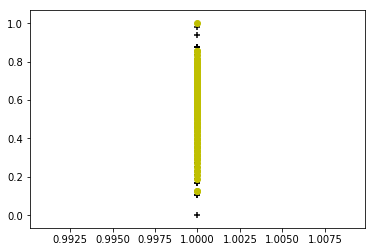

In [8]:
result = opt.fmin_tnc(func = coste, x0 = Theta, fprime = gradiente, args = (X_ones, y))
theta_opt = result[0]

print(np.shape(X))
y = y.ravel()
print(np.shape(y))
print(np.shape(theta_opt))

# TODO: descubrir por que no funcionan!!!
plt_f.plot_frontier(theta_opt, X, y) # X_ones???
# plt_f.plot_frontier_3D(theta_opt, X, y)
# plt_f.accuracy_percentage(theta_opt, X_ones, y)